### Read car fuel efficiency data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
# Ensure all columns are displayed side by side
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  acceleration  model_year  origin fuel_type         drivetrain  num_doors  fuel_efficiency_mpg
0                  170            3.0       159.0     3413.433759          17.7        2003  Europe  Gasoline    All-wheel drive        0.0            13.231729
1                  130            5.0        97.0     3149.664934          17.8        2007     USA  Gasoline  Front-wheel drive        0.0            13.688217
2                  170            NaN        78.0     3079.038997          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0            14.246341
3                  220            4.0         NaN     2542.392402          20.2        2009     USA    Diesel    All-wheel drive        2.0            16.912736
4                  210            1.0       140.0     3460.870990          14.4        2009  Europe  Gasoline    All-wheel drive        2.0            12.488369


In [4]:
Columns_to_use = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

df = df[Columns_to_use]
print(df.head(10))


   engine_displacement  horsepower  vehicle_weight  model_year  fuel_efficiency_mpg
0                  170       159.0     3413.433759        2003            13.231729
1                  130        97.0     3149.664934        2007            13.688217
2                  170        78.0     3079.038997        2018            14.246341
3                  220         NaN     2542.392402        2009            16.912736
4                  210       140.0     3460.870990        2009            12.488369
5                  190         NaN     2484.883986        2008            17.271818
6                  240       127.0     3006.542287        2012            13.210412
7                  150       239.0     3638.657780        2020            12.848884
8                  250       174.0     2714.219310        2016            16.823554
9                  150       123.0     3509.036569        2005            12.298355


### EDA
##### Look at the fuel_efficiency_mpg variable. Does it have a long tail?

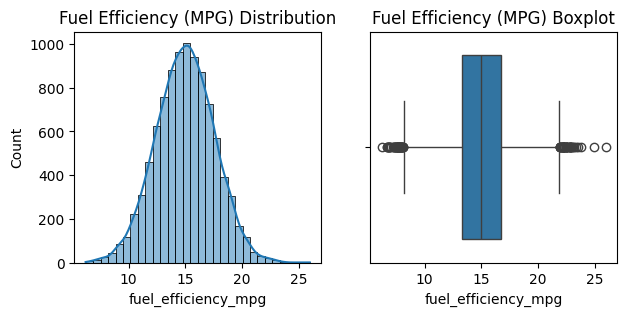

In [5]:
mpg = df['fuel_efficiency_mpg']
# Plot histogram and boxplot
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(mpg, kde=True, bins=30)
plt.title('Fuel Efficiency (MPG) Distribution')

plt.subplot(1,2,2)
sns.boxplot(x=mpg)
plt.title('Fuel Efficiency (MPG) Boxplot')

plt.show()

#### Outliers exist but do not dominate or stretch the data in one direction. So there is no long tail problem.

In [6]:
skew_value = mpg.skew()
print(f"Skewness: {skew_value:.2f}")


Skewness: -0.01


#### A skewness of "–0.01" means fuel_efficiency_mpg distribution is almost perfectly symmetric. There is no significant long tail on either side.

### Question 1
#### There's one column with missing values. What is it?

In [7]:
df.isnull().sum()>0

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [8]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2
#### What's the median (50% percentile) for variable 'horsepower'?

In [9]:
percentile = df['horsepower'].median()
print(f"Median (50th percentile) of horsepower: {percentile}")


Median (50th percentile) of horsepower: 149.0


### Prepare and split the dataset
#### Shuffle the dataset (the filtered one you created above), use seed 42.
#### Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [12]:
# Shuffle the dataset using a random seed for reproducibility
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split: 60% train, 20% val, 20% test
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Check proportions
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")



Train size: 5822
Validation size: 1941
Test size: 1941


In [19]:


# Now show the descriptive statistics
print(train_df.describe())


       engine_displacement   horsepower  vehicle_weight   model_year  fuel_efficiency_mpg
count          5822.000000  5406.000000     5822.000000  5822.000000          5822.000000
mean            200.109928   149.388272     3008.836245  2011.484370            14.941736
std              49.257552    29.637595      490.074023     6.613305             2.511630
min              30.000000    37.000000     1066.328301  2000.000000             6.200971
25%             170.000000   130.000000     2675.044455  2006.000000            13.231917
50%             200.000000   149.000000     3004.433599  2012.000000            14.937274
75%             230.000000   169.000000     3342.260141  2017.000000            16.652870
max             380.000000   271.000000     4739.077089  2023.000000            24.971452


### Question 3
#### We need to deal with missing values for the column from Q1.
#### We have two options: fill it with 0 or with the mean of this variable.
#### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
#### For computing the mean, use the training only!
#### Use the validation dataset to evaluate the models and compare the RMSE of each option.
#### Round the RMSE scores to 2 decimal digits using round(score, 2)
#### Which option gives better RMSE?

In [20]:

# Model 1: Fill with 0
train_zero = train_df.copy()
val_zero = val_df.copy()

train_zero['fuel_efficiency_mpg'] = train_zero['fuel_efficiency_mpg'].fillna(0)
val_zero['fuel_efficiency_mpg'] = val_zero['fuel_efficiency_mpg'].fillna(0)

X_train_zero = train_zero.drop(columns=['fuel_efficiency_mpg'])
y_train_zero = train_zero['fuel_efficiency_mpg']

X_val_zero = val_zero.drop(columns=['fuel_efficiency_mpg'])
y_val_zero = val_zero['fuel_efficiency_mpg']

model_zero = LinearRegression()
model_zero.fit(X_train_zero, y_train_zero)
preds_zero = model_zero.predict(X_val_zero)

rmse_zero = np.sqrt(mean_squared_error(y_val_zero, preds_zero))
rmse_zero = round(rmse_zero, 2)


print(f"RMSE (Fill with 0): {rmse_zero}")



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
# Model 2: Fill with Mean (computed from training only)
train_mean = train_df.copy()
val_mean = val_df.copy()

mean_train_value = train_mean['fuel_efficiency_mpg'].mean()

train_mean['fuel_efficiency_mpg'] = train_mean['fuel_efficiency_mpg'].fillna(mean_train_value)
val_mean['fuel_efficiency_mpg'] = val_mean['fuel_efficiency_mpg'].fillna(mean_train_value)  # <-- use training mean

X_train_mean = train_mean.drop(columns=['fuel_efficiency_mpg'])
y_train_mean = train_mean['fuel_efficiency_mpg']

X_val_mean = val_mean.drop(columns=['fuel_efficiency_mpg'])
y_val_mean = val_mean['fuel_efficiency_mpg']

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)
preds_mean = model_mean.predict(X_val_mean)

rmse_mean = np.sqrt(mean_squared_error(y_val_mean, preds_mean))
rmse_mean = round(rmse_mean, 2)
print(f"RMSE (Fill with Mean): {rmse_mean}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# comparing both gives us same results
print(f'RMSE filling methods comparison: fill with 0 gives {rmse_zero} and fill with mean gives {rmse_mean}')
print('Both methods yield the same RMSE in this case')

RMSE filling methods comparison: fill with 0 gives 0.52 and fill with mean gives 0.52
Both methods yield the same RMSE in this case


### Question 4
#### Now let's train a regularized linear regression.
#### For this question, fill the NAs with 0.
#### Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
#### Use RMSE to evaluate the model on the validation dataset.
#### Round the RMSE scores to 2 decimal digits.
#### Which r gives the best RMSE?

In [ ]:

# Fill NAs with 0
train_df = train_df.fillna(0)
val_df = val_df.fillna(0)

# Separate features and target
X_train = train_df.drop(columns=['fuel_efficiency_mpg'])
y_train = train_df['fuel_efficiency_mpg']

X_val = val_df.drop(columns=['fuel_efficiency_mpg'])
y_val = val_df['fuel_efficiency_mpg']

# Try different r (alpha) values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    model = Ridge(alpha=r)  # alpha = r
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores[r] = round(rmse, 2)

# Print all results
for r, rmse in rmse_scores.items():
    print(f"r = {r}: RMSE = {rmse}")

# Find best r (lowest RMSE)
best_r = min(rmse_scores, key=rmse_scores.get)
print(f"\nBest r (lowest RMSE): {best_r} with RMSE = {rmse_scores[best_r]}")


r = 0: RMSE = 0.52
r = 0.01: RMSE = 0.52
r = 0.1: RMSE = 0.52
r = 1: RMSE = 0.52
r = 5: RMSE = 0.52
r = 10: RMSE = 0.52
r = 100: RMSE = 0.52

Best r (lowest RMSE): 0 with RMSE = 0.52


### Question 5
##### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
##### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
##### For each seed, do the train/validation/test split with 60%/20%/20% distribution.
##### Fill the missing values with 0 and train a model without regularization.
##### For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
##### What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
##### Round the result to 3 decimal digits (round(std, 3))

In [ ]:

# List of seeds to test
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []

# Loop through each seed
for seed in seeds:
    # Shuffle and split data
    df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    train_df, temp_df = train_test_split(df, test_size=0.4, random_state=seed)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=seed)
    
    # Fill missing values with 0
    train_df = train_df.fillna(0)
    val_df = val_df.fillna(0)

    # Split into X and y
    X_train = train_df.drop(columns=['fuel_efficiency_mpg'])
    y_train = train_df['fuel_efficiency_mpg']
    X_val = val_df.drop(columns=['fuel_efficiency_mpg'])
    y_val = val_df['fuel_efficiency_mpg']

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate RMSE on validation set
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

# Compute standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)
std_rmse = round(std_rmse, 3)


for seed, rmse in zip(seeds, rmse_scores):
    print(f"Seed {seed}: RMSE = {round(rmse, 2)}")

print(f"\nStandard deviation of RMSE across seeds: {std_rmse}")


NameError: name 'df' is not defined